In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, max_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.impute import SimpleImputer

# Load data from the local Excel file
df = pd.read_excel("Main_Data_Set.xlsx")

# Extract input and output data for the first 676 sets
X = df[['Nodes', 'Radius', 'packet_sent', 'Packet_received', 'Actual PDR']].iloc[:676]
Y = df[['SF7', 'SF8', 'SF9', 'SF10', 'SF11', 'SF12']].iloc[:676]  # Multiple outputs


# Impute missing values in the input data
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Handle missing values in the target variable Y
Y_imputed = np.nan_to_num(Y)

# Define models
models = {
    "Bagging": BaggingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Voting": VotingRegressor([('lr', LinearRegression()), ('dt', DecisionTreeRegressor()), ('rf', RandomForestRegressor())]),
    "Stacking": StackingRegressor([('lr', LinearRegression()), ('dt', DecisionTreeRegressor()), ('rf', RandomForestRegressor())]),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "k-Nearest Neighbors": KNeighborsRegressor(),
}

# Perform train-test split for the subset of data
X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y_imputed, test_size=0.2, random_state=42)

# Scale input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aggregate predictions from all models and compute evaluation metrics
metrics = {}
for model_name, model in models.items():
    # Fit the model for each output column individually
    Y_train_pred = np.zeros_like(Y_train)
    Y_test_pred = np.zeros_like(Y_test)
    
    for i in range(Y_train.shape[1]):  # Iterate over each output column
        # Fit the model
        model.fit(X_train_scaled, Y_train[:, i])
        
        # Predict for train and test sets
        Y_train_pred[:, i] = model.predict(X_train_scaled)
        Y_test_pred[:, i] = model.predict(X_test_scaled)

    # Compute evaluation metrics
    mse = mean_squared_error(Y_test, Y_test_pred)
    mae = mean_absolute_error(Y_test, Y_test_pred)
    r2_train = r2_score(Y_train, Y_train_pred)
    r2_test = r2_score(Y_test, Y_test_pred)
    explained_variance = explained_variance_score(Y_test, Y_test_pred)
    max_err = np.max(np.abs(Y_test - Y_test_pred), axis=0)  # Maximum error for each output variable
    
    metrics[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'Explained Variance': explained_variance,
        'Max Error': max_err
    }

# Print evaluation metrics for each model
for model_name, metrics_dict in metrics.items():
    print(f"Model: {model_name}")
    print(f"MSE: {metrics_dict['MSE']}")
    print(f"MAE: {metrics_dict['MAE']}")
    print(f"R2 Train: {metrics_dict['R2 Train']}")
    print(f"R2 Test: {metrics_dict['R2 Test']}")
    print(f"Explained Variance: {metrics_dict['Explained Variance']}")
    print(f"Max Error: {metrics_dict['Max Error']}")
    print()





Model: Bagging
MSE: 94.62962962962963
MAE: 1.871604938271605
R2 Train: 0.9836431510081174
R2 Test: 0.9585007580333552
Explained Variance: 0.9592188703099582
Max Error: [ 11  13  19  36  86 174]

Model: Random Forest
MSE: 33.42469135802469
MAE: 1.4246913580246912
R2 Train: 0.9847035732197299
R2 Test: 0.9587388350839606
Explained Variance: 0.9595448792662392
Max Error: [ 12  17  11  41  43 107]

Model: Voting
MSE: 42.13333333333333
MAE: 2.466666666666667
R2 Train: 0.976282397783565
R2 Test: 0.9535370274152849
Explained Variance: 0.955009775054151
Max Error: [ 12  17  10  31  42 104]

Model: Stacking
MSE: 39.88395061728395
MAE: 2.244444444444445
R2 Train: 0.9684154559136086
R2 Test: 0.9646988719299534
Explained Variance: 0.9651305324816691
Max Error: [14 13 19 14 55 87]

Model: Linear Regression
MSE: 159.8641975308642
MAE: 5.637037037037037
R2 Train: 0.8536676934680859
R2 Test: 0.9161031083858541
Explained Variance: 0.9183999027954886
Max Error: [27 12 14 31 52 98]

Model: Decision Tree
M

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, max_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


# Load data from the local CSV file
df = pd.read_csv("Data_Set_1_with_SF_Allocator.csv")

# Ensure that column names are stripped of leading and trailing spaces
df.columns = df.columns.str.strip()

# Select relevant columns
columns_to_keep = ['Nodes', 'Radius', 'packet_sent', 'Packet_received', 'X Coordinate', 'Y Coordinate', 'Z Coordinate','Received Power', 'SF']
df = df[columns_to_keep]

# Split data into input (X) and output (y)
X = df.drop(columns=['SF'])
y = df['SF']

# Impute missing values in the input data
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Handle missing values in the target variable y
y_imputed = np.nan_to_num(y)

# Define models
models = {
    "Bagging": BaggingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Voting": VotingRegressor([('lr', LinearRegression()), ('dt', DecisionTreeRegressor()), ('rf', RandomForestRegressor())]),
    "Stacking": StackingRegressor([('lr', LinearRegression()), ('dt', DecisionTreeRegressor()), ('rf', RandomForestRegressor())]),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "k-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(silent=True)  # Set silent=True to suppress output
}

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Scale input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    print(f"{model_name} R^2 Score: {score}")

# Optionally, you can choose the best performing model for further analysis
best_model_name = max(models, key=lambda x: models[x].score(X_test_scaled, y_test))
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")
print(f"{best_model_name} R^2 Score: {best_model.score(X_test_scaled, y_test)}")


Training Bagging...
Bagging R^2 Score: 0.9999999611326321
Training Random Forest...
Random Forest R^2 Score: 0.9999999980566316
Training Voting...
Voting R^2 Score: 0.9674842841082797
Training Stacking...
Stacking R^2 Score: 0.9999999999927106
Training AdaBoost...
AdaBoost R^2 Score: 1.0
Training Gradient Boosting...
Gradient Boosting R^2 Score: 0.9999999992944918
Training Linear Regression...
Linear Regression R^2 Score: 0.7073587053296342
Training Decision Tree...
Decision Tree R^2 Score: 1.0
Training k-Nearest Neighbors...
k-Nearest Neighbors R^2 Score: 0.9947294294443508
Training XGBoost...
XGBoost R^2 Score: 0.9999912868141786
Training CatBoost...
CatBoost R^2 Score: 0.9999839335153757

Best Model: AdaBoost
AdaBoost R^2 Score: 1.0


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Load data from the local CSV file
df = pd.read_csv("Main_Data_Set_All_Nodes.csv")

# Ensure that column names are stripped of leading and trailing spaces
df.columns = df.columns.str.strip()

# Select relevant columns
columns_to_keep = ['Nodes', 'Radius', 'packet_sent', 'Packet_received', 'X Coordinate', 'Y Coordinate', 'Z Coordinate','Received Power', 'SF']
df = df[columns_to_keep]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split data into input (X) and output (y)
X = df_imputed.drop(columns=['SF'])
y = df_imputed['SF']

# Scale input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define models
models = {
    "Bagging": BaggingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Voting": VotingRegressor([('lr', LinearRegression()), ('dt', DecisionTreeRegressor()), ('rf', RandomForestRegressor())]),
    "Stacking": StackingRegressor([('lr', LinearRegression()), ('dt', DecisionTreeRegressor()), ('rf', RandomForestRegressor())]),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "k-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(silent=True)  # Set silent=True to suppress output
}

# Create a new DataFrame to store predicted SF for each model
predictions_df = pd.DataFrame()

# Train and predict for each model
for model_name, model in models.items():
    print(f"Training and predicting with {model_name}...")
    model.fit(X_scaled, y)
    predicted_sf = model.predict(X_scaled)
    # Round off predicted values to the nearest integer
    predicted_sf_rounded = np.round(predicted_sf)
    predictions_df[f'SF_{model_name}'] = predicted_sf_rounded
    
    # Calculate performance metrics
    r2 = r2_score(y, predicted_sf)
    mae = mean_absolute_error(y, predicted_sf)
    mse = mean_squared_error(y, predicted_sf)
    rmse = np.sqrt(mse)
    
    # Print performance metrics
    print(f"Performance metrics for {model_name}:")
    print(f"R-squared (R2) Score: {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print("")

# Concatenate the prediction DataFrame with the original DataFrame
result_df = pd.concat([df_imputed, predictions_df], axis=1)

# Save the result to a new CSV file
result_df.to_csv("Predicted_SF_Result.csv", index=False)

print("Prediction results saved to Predicted_SF_Result.csv")


Training and predicting with Bagging...
Performance metrics for Bagging:
R-squared (R2) Score: 0.9999998574177016
Mean Absolute Error (MAE): 4.783045029175955e-06
Mean Squared Error (MSE): 4.4936152575300527e-07
Root Mean Squared Error (RMSE): 0.0006703443337218606

Training and predicting with Random Forest...
Performance metrics for Random Forest:
R-squared (R2) Score: 0.9999997992710029
Mean Absolute Error (MAE): 6.042704717441916e-06
Mean Squared Error (MSE): 6.326163161421902e-07
Root Mean Squared Error (RMSE): 0.0007953718099996946

Training and predicting with Voting...
Performance metrics for Voting:
R-squared (R2) Score: 0.9675977658731071
Mean Absolute Error (MAE): 0.2479910569349725
Mean Squared Error (MSE): 0.10211868880946764
Root Mean Squared Error (RMSE): 0.31956014896959173

Training and predicting with Stacking...
Performance metrics for Stacking:
R-squared (R2) Score: 0.9999999353559315
Mean Absolute Error (MAE): 6.337838842549107e-05
Mean Squared Error (MSE): 2.03731

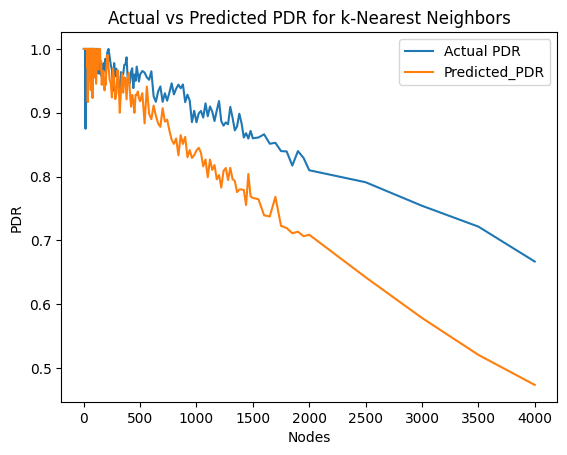

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv("Data_Set_1_with_Prediction_Performance.csv")

# Define the model name
model_name = "k-Nearest Neighbors"

# Filter rows where 'Radius' column has value 6400
filtered_df = df[df['Radius'] == 6400]

# Convert columns to integer, handling non-finite values
filtered_df['packet_sent'] = filtered_df['packet_sent'].astype(int)

# Handle non-finite values in 'Packet_received' column
filtered_df['Packet_received'] = pd.to_numeric(filtered_df['Packet_received'], errors='coerce').fillna(0).astype(int)

# Handle non-finite values in 'Sent_Predicted' column
filtered_df['Sent_Predicted'] = pd.to_numeric(filtered_df['Sent_Predicted'], errors='coerce').fillna(0).astype(int)

# Handle non-finite values in 'Received_Predicted' column
filtered_df['Received_Predicted'] = pd.to_numeric(filtered_df['Received_Predicted'], errors='coerce').fillna(0).astype(int)

# Calculate Actual PDR and Predicted PDR
filtered_df['Actual_PDR'] =  filtered_df['Packet_received'] / filtered_df['packet_sent']
filtered_df['Predicted_PDR'] = filtered_df['Received_Predicted'] / filtered_df['Sent_Predicted']

# Filter rows where 'Nodes' is up to 1500
filtered_df = filtered_df[filtered_df['Nodes'] <= 7000]

# Plot Actual PDR and Predicted PDR
plt.plot(filtered_df['Nodes'], filtered_df['Actual_PDR'], label='Actual PDR')
plt.plot(filtered_df['Nodes'], filtered_df['Predicted_PDR'], label='Predicted_PDR')
plt.xlabel('Nodes')
plt.ylabel('PDR')
plt.title(f'Actual vs Predicted PDR for {model_name}')
plt.legend()
plt.savefig(f'ActualVs{model_name}_upto_1500.png')
plt.show()


KeyboardInterrupt: 

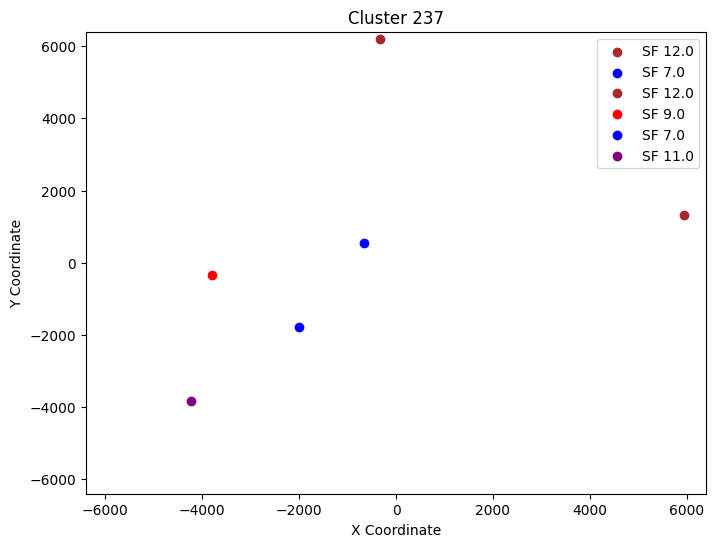

In [30]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# Load data from the CSV file
df = pd.read_csv("Data_Set_1_with_Prediction_Performance.csv")

# Convert 'X Coordinate' and 'Y Coordinate' columns to floats, handling NaN values
df['X Coordinate'] = pd.to_numeric(df['X Coordinate'], errors='coerce')
df['Y Coordinate'] = pd.to_numeric(df['Y Coordinate'], errors='coerce')

# Sort the DataFrame by 'Nodes' and 'Radius'
df = df.sort_values(by=['Nodes', 'Radius'])

# Create a directory to save plots
plots_dir = "Lorawan_Plots/Concentric_Alternate_Nodes"
os.makedirs(plots_dir, exist_ok=True)

# Define colors for SF values
sf_colors = {'7.0': 'blue', '8.0': 'green', '9.0': 'red', '10.0': 'orange', '11.0': 'purple', '12.0': 'brown'}

# Initialize variables
cluster_id = 1
cluster_nodes = []

# Iterate through each row of the DataFrame
for index, row in df.iterrows():
    # Add current node to cluster_nodes
    cluster_nodes.append((row['X Coordinate'], row['Y Coordinate'], row['Nodes'], row['Radius'], str(row['SF'])))
    
    # Check if cluster_nodes has 6 nodes
    if len(cluster_nodes) == 6 or index == len(df) - 1:
        # Form a cluster
        plt.figure(figsize=(8, 6))
        plt.title(f'Cluster {cluster_id}')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.xlim(-6400, 6400)
        plt.ylim(-6400, 6400)
        
        # Plot nodes in the cluster
        for x, y, nodes, radius, sf in cluster_nodes:
            plt.scatter(x, y, color=sf_colors[sf], marker='o', label=f'SF {sf}')
        
        plt.legend()
        plot_name = f"{plots_dir}/Cluster_{cluster_id}.png"
        plt.savefig(plot_name)
        plt.close()
        
        # Clear cluster_nodes for next cluster
        cluster_nodes = []
        cluster_id += 1


/tmp/ipykernel_3840/4070539158.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_rate_df = pd.concat([data_rate_df, pd.DataFrame(data_rate_row, index=[0])], ignore_index=True)


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'Data_Rate_Nodes.csv'
df = pd.read_csv(file_path)

# Define the list of machine learning models
models = ['Bagging', 'Random Forest', 'Voting', 'Stacking', 'AdaBoost', 'Gradient Boosting', 'Linear Regression', 'Decision Tree', 'k-Nearest Neighbors', 'XGBoost', 'CatBoost']

# Iterate through each row
mean_data_rates = {'Actual_DR': [], 'Nodes': []}
for model in models:
    mean_data_rates[f'DR_{model}'] = []

current_nodes = None
data_rates = {'Actual_DR': [], 'Nodes': []}
for model in models:
    data_rates[f'DR_{model}'] = []

for index, row in df.iterrows():
    if current_nodes is None:
        current_nodes = row['Nodes']
    
    if row['Nodes'] != current_nodes:
        # Calculate mean data rate for previous 'Nodes' value
        mean_data_rates['Nodes'].append(current_nodes)
        for model in models:
            mean_data_rates[f'DR_{model}'].append(sum(data_rates[f'DR_{model}']) / len(data_rates[f'DR_{model}']))
        mean_data_rates['Actual_DR'].append(sum(data_rates['Actual_DR']) / len(data_rates['Actual_DR']))
        
        # Reset data_rates dictionary
        current_nodes = row['Nodes']
        data_rates = {'Actual_DR': [], 'Nodes': [current_nodes]}
        for model in models:
            data_rates[f'DR_{model}'] = []

    # Add data rates for current row
    data_rates['Actual_DR'].append(row['Actual_DR'])
    for model in models:
        data_rates[f'DR_{model}'].append(row[f'DR_{model}'])

# If there are remaining data rates, calculate mean for the last 'Nodes' value
if data_rates['Nodes']:
    mean_data_rates['Nodes'].append(current_nodes)
    for model in models:
        mean_data_rates[f'DR_{model}'].append(sum(data_rates[f'DR_{model}']) / len(data_rates[f'DR_{model}']))
    mean_data_rates['Actual_DR'].append(sum(data_rates['Actual_DR']) / len(data_rates['Actual_DR']))

# Plotting and saving figures
for model in models:
    plt.figure(figsize=(10, 6))

    # Plot mean of 'Actual_DR'
    plt.plot(mean_data_rates['Nodes'], mean_data_rates['Actual_DR'], marker='o', label='Mean Actual_DR')

    # Plot mean of 'DR_{model}'
    plt.plot(mean_data_rates['Nodes'], mean_data_rates[f'DR_{model}'], marker='o', label=f'Mean DR_{model}')

    plt.xlabel('Nodes')
    plt.ylabel('Mean Data Rate')
    plt.title(f'Mean Data Rate Vs. Nodes for {model}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'Data_Rate_{model}.png')
    plt.close()


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load data from the CSV file
df = pd.read_csv("Predicted_SF_Result.csv", low_memory=False)

# Convert 'X Coordinate' and 'Y Coordinate' columns to floats, handling NaN values
df['X Coordinate'] = pd.to_numeric(df['X Coordinate'], errors='coerce')
df['Y Coordinate'] = pd.to_numeric(df['Y Coordinate'], errors='coerce')

# Define colors for SF values
sf_colors = {'7': 'blue', '8': 'green', '9': 'red', '10': 'orange', '11': 'purple', '12': 'brown'}

model_dir = f"Lorawan_NS3_simulator_Plots/"
os.makedirs(model_dir, exist_ok=True)  # Create directory if it doesn't exist

# Set the range for x and y axes
x_range = (-6400, 6400)
y_range = (-6400, 6400)

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    # Check if 'Nodes' = 1750 and 'Radius' = 6400
    if row['Nodes'] == 1750 and row['Radius'] == 6400:
        # Plot the current point with label and color based on 'SF' value
        sf_value = row['SF']  # Retrieve SF value
        plt.scatter(row['X Coordinate'], row['Y Coordinate'], color=sf_colors.get(sf_value), marker='o')

# Save the plot
plot_name = f"{model_dir}/Nodes_1750_Radius_6400.png"
plt.title(f'Lorawan_NS3_simulator - Nodes=1750, Radius=6400')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.xlim(x_range)
plt.ylim(y_range)
plt.savefig(plot_name)
plt.close()


FileNotFoundError: [Errno 2] No such file or directory: 'Predictor.csv'

KeyboardInterrupt: 

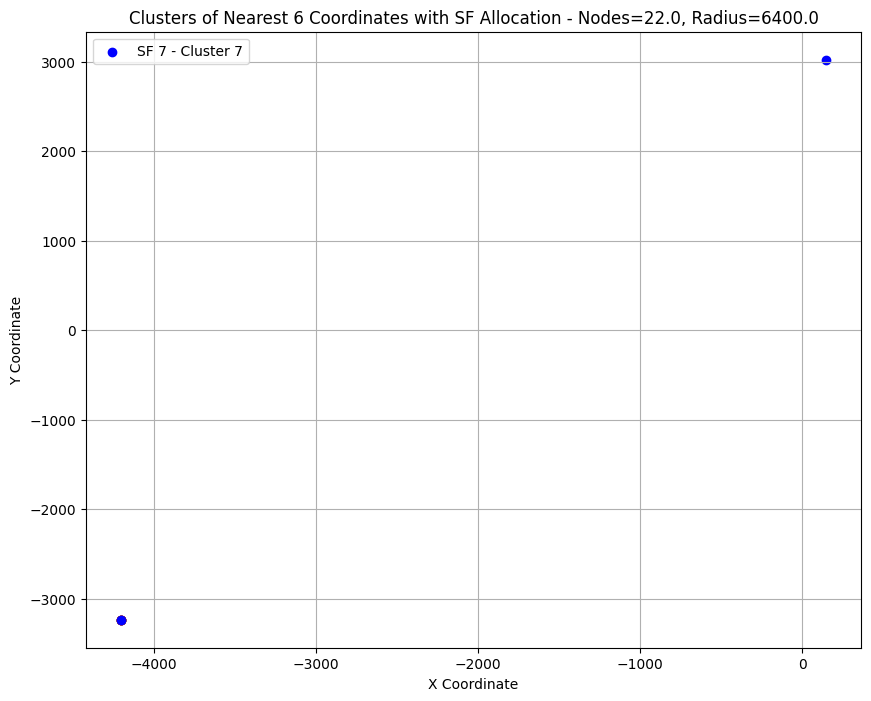

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load data from the CSV file
df = pd.read_csv("Predicted_SF_Result.csv")

# Sort the DataFrame by 'Nodes'
df = df.sort_values(by=['Nodes'])

# Define colors for SF values
sf_colors = {'7': 'blue', '8': 'green', '9': 'red', '10': 'orange', '11': 'purple', '12': 'brown'}

# Function to calculate Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Function to find the nearest 6 coordinates to a given coordinate
def find_nearest_6(coordinates, current_index):
    current_coord = coordinates[current_index]
    distances = [(i, euclidean_distance(current_coord, coordinates[i])) for i in range(len(coordinates)) if i != current_index]
    distances.sort(key=lambda x: x[1])
    return [coordinates[index] for index, _ in distances[:6]]

# Create directory for saving plots
plots_dir = "Lorawan_Plots/Clustering"
os.makedirs(plots_dir, exist_ok=True)

# Plotting
current_nodes = None
cluster_id = 1
for index, row in df.iterrows():
    nodes = row['Nodes']
    radius = row['Radius']
    x_coord = row['X Coordinate']
    y_coord = row['Y Coordinate']
    
    # Check if 'Nodes' value changes
    if nodes != current_nodes:
        # New cluster, reset cluster ID
        cluster_id = 1
        current_nodes = nodes
    
    # Form the cluster by finding nearest 6 coordinates
    cluster_coords = find_nearest_6(df[['X Coordinate', 'Y Coordinate']].values, index)
    cluster_coords.append([x_coord, y_coord])  # Include the current coordinate in the cluster
    cluster_coords = np.array(cluster_coords)
    
    # Allocate SFs 7 to 12 based on increasing distance from origin and plot
    sf_values = np.arange(7, 13)
    distances = np.sqrt(np.sum(cluster_coords**2, axis=1))  # Calculate distances from origin
    distances_sorted_indices = np.argsort(distances)  # Sort indices based on distances
    
    plt.figure(figsize=(10, 8))
    for i, idx in enumerate(distances_sorted_indices):
        sf = sf_values[i % len(sf_values)]  # Cycle through SF values
        plt.scatter(cluster_coords[idx, 0], cluster_coords[idx, 1], color=sf_colors[str(sf)], marker='o', label=f'SF {sf} - Cluster {cluster_id}' if i == 0 else None)
    
    plt.title(f'Clusters of Nearest 6 Coordinates with SF Allocation - Nodes={nodes}, Radius={radius}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True)
    
    # Save plot
    plot_name = os.path.join(plots_dir, f"{nodes}_{radius}.png")
    plt.savefig(plot_name)
    plt.close()

    cluster_id += 1


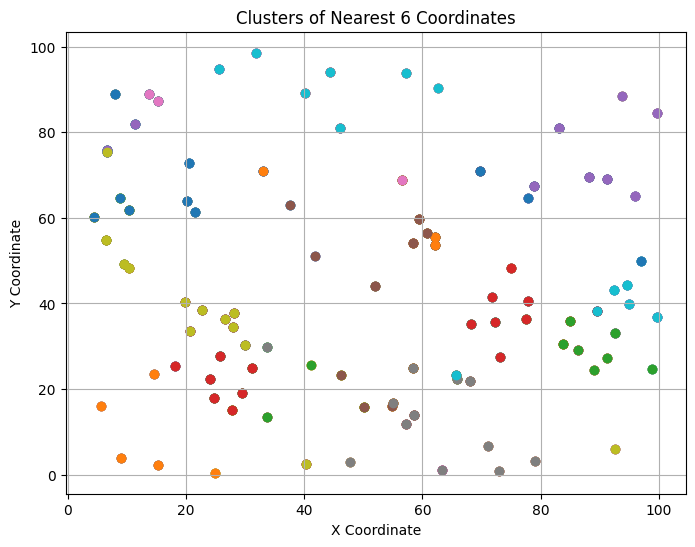

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Function to find the nearest 6 coordinates to a given coordinate
def find_nearest_6(coordinates, current_index):
    current_coord = coordinates[current_index]
    distances = [(i, euclidean_distance(current_coord, coordinates[i])) for i in range(len(coordinates)) if i != current_index]
    distances.sort(key=lambda x: x[1])
    return [coordinates[index] for index, _ in distances[:6]]

# Generate some random coordinates (replace this with your actual data)
num_points = 100
coordinates = np.random.rand(num_points, 2) * 100  # Generating random coordinates between 0 and 100

# Plot all points
plt.figure(figsize=(8, 6))
plt.scatter(coordinates[:, 0], coordinates[:, 1], color='grey', alpha=0.5, label='All Points')

# Loop over each coordinate to form clusters
for i in range(len(coordinates)):
    cluster_coords = find_nearest_6(coordinates, i)
    cluster_coords.append(coordinates[i])  # Include the current coordinate in the cluster
    cluster_coords = np.array(cluster_coords)
    plt.scatter(cluster_coords[:, 0], cluster_coords[:, 1], marker='o', label=f'Cluster {i+1}')

plt.title('Clusters of Nearest 6 Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Load data from the CSV file
df = pd.read_csv("Data_Set_1_with_Prediction_Performance.csv")

# Filter rows where 'Nodes' is 1750 and 'Radius' is 6400
df = df[(df['Nodes'] == 1750) & (df['Radius'] == 6400)].reset_index(drop=True)

# Create directory for saving plots
plots_dir = "Lorawan_Plots/Concentric_Alternate_Nodes"
os.makedirs(plots_dir, exist_ok=True)

# Function to calculate Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Function to find the nearest 6 coordinates to a given coordinate
def find_nearest_6(coordinates, current_index):
    current_coord = coordinates[current_index]
    distances = [(i, euclidean_distance(current_coord, coordinates[i])) for i in range(len(coordinates)) if i != current_index]
    distances.sort(key=lambda x: x[1])
    return [coordinates[index] for index, _ in distances[:6]]

# Initialize variables to track the previous combination of 'Nodes' and 'Radius'
prev_nodes = None
prev_radius = None

# Plotting
for index, row in df.iterrows():
    nodes = row['Nodes']
    radius = row['Radius']
    x_coord = row['X Coordinate']
    y_coord = row['Y Coordinate']
    
    # Check if combination of 'Nodes' and 'Radius' changed
    if nodes != prev_nodes or radius != prev_radius:
        # If changed, reset cluster ID
        plt.figure(figsize=(10, 8))
        prev_nodes = nodes
        prev_radius = radius
    
    # Form the cluster by finding nearest 6 coordinates
    cluster_coords = find_nearest_6(df[['X Coordinate', 'Y Coordinate']].values, index)
    cluster_coords.append([x_coord, y_coord])  # Include the current coordinate in the cluster
    cluster_coords = np.array(cluster_coords)
    
    # Plot cluster
    plt.scatter(cluster_coords[:, 0], cluster_coords[:, 1], marker='o', label=f'Nodes={nodes}, Radius={radius}')

    # Save plot when combination of 'Nodes' and 'Radius' changes or at the end of the file
    if index == len(df) - 1 or (nodes != df.iloc[index+1]['Nodes'] or radius != df.iloc[index+1]['Radius']):
        plt.title(f'Cluster for Nodes={nodes}, Radius={radius}')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid(True)
        
        # Save plot
        plot_name = os.path.join(plots_dir, f"{nodes}_{radius}.png")
        plt.savefig(plot_name)
        plt.close()


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Load data from the CSV file
df = pd.read_csv("Predicted_SF_Result.csv")

# Filter rows where 'Nodes' is 1750 and 'Radius' is 6400
df = df[(df['Nodes'] == 1750) & (df['Radius'] == 6400)].reset_index(drop=True)

# Create directory for saving plots
plots_dir = "Lorawan_Plots/Clustering"
os.makedirs(plots_dir, exist_ok=True)

# Define color scheme for SF values
sf_colors = {'7': 'blue', '8': 'green', '9': 'red', '10': 'orange', '11': 'purple', '12': 'brown'}

# Function to calculate Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Function to find the nearest 6 coordinates to a given coordinate
def find_nearest_6(coordinates, current_index):
    current_coord = coordinates[current_index]
    distances = [(i, euclidean_distance(current_coord, coordinates[i])) for i in range(len(coordinates)) if i != current_index]
    distances.sort(key=lambda x: x[1])
    return [coordinates[index] for index, _ in distances[:6]]

# Function to allocate SFs based on distance slot
def allocate_sf(distance, sf_allocation):
    if distance <= 1200:
        sf_options = {'7', '8'}
    elif distance <= 2400:
        sf_options = {'8', '9'}
    elif distance <= 3600:
        sf_options = {'9', '10'}
    elif distance <= 4800:
        sf_options = {'10', '11'}
    elif distance <= 6000:
        sf_options = {'11', '12'}
    else:
        sf_options = {'12'}

    # Allocate SF to cluster such that no alternate clusters get allocated the same SF within that distance slot
    for sf in sf_options:
        if len(sf_allocation[sf]) == 0 or sf_allocation[sf][-1] != index - 1:
            sf_allocation[sf].append(index)
            return sf
    return None


# Initialize variables to track the previous combination of 'Nodes' and 'Radius'
prev_nodes = None
prev_radius = None

# Initialize SF allocation dictionary for each distance slot
sf_allocation = {'7': [], '8': [], '9': [], '10': [], '11': [], '12': []}

# Plotting
for index, row in df.iterrows():
    nodes = row['Nodes']
    radius = row['Radius']
    x_coord = row['X Coordinate']
    y_coord = row['Y Coordinate']
    
    # Check if combination of 'Nodes' and 'Radius' changed
    if nodes != prev_nodes or radius != prev_radius:
        # If changed, reset cluster ID
        plt.figure(figsize=(12, 10))
        prev_nodes = nodes
        prev_radius = radius
    
    # Form the cluster by finding nearest 6 coordinates
    cluster_coords = find_nearest_6(df[['X Coordinate', 'Y Coordinate']].values, index)
    cluster_coords.append([x_coord, y_coord])  # Include the current coordinate in the cluster
    cluster_coords = np.array(cluster_coords)
    
    # Calculate distance of centroid from origin
    distance_from_origin = np.sqrt(x_coord**2 + y_coord**2)
    
    # Allocate SF based on distance slot
    sf = allocate_sf(distance_from_origin, sf_allocation)
    
    # If SF couldn't be allocated, skip plotting this cluster
    if sf is None:
        continue
    
    # Plot cluster
    plt.scatter(cluster_coords[:, 0], cluster_coords[:, 1], marker='o', label=f'Nodes={nodes}, Radius={radius}', color=sf_colors[sf])
    
    # Save plot when combination of 'Nodes' and 'Radius' changes or at the end of the file
    if index == len(df) - 1 or (nodes != df.iloc[index+1]['Nodes'] or radius != df.iloc[index+1]['Radius']):
        plt.title(f'Cluster for Nodes={nodes}, Radius={radius}')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid(True)
        
        # Save legend of SFs with their color schemes outside the plot
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='SF Allocation')
        legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sf_colors[sf], markersize=10, label=f'SF {sf}') for sf in sf_allocation.keys()]
        plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.5), title='SF Allocation')
        
        # Save plot
        plot_name = os.path.join(plots_dir, f"{nodes}_{radius}.png")
        plt.savefig(plot_name, bbox_inches='tight')
        plt.close()


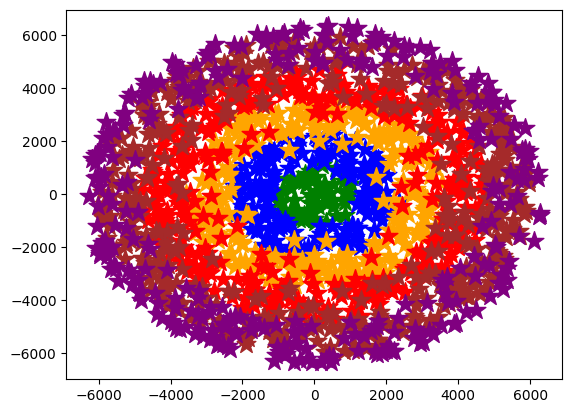

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Load data from the CSV file
df = pd.read_csv("Predicted_SF_Result.csv")

# Filter rows where 'Nodes' is 1750 and 'Radius' is 6400
df = df[(df['Nodes'] == 1750) & (df['Radius'] == 6400)].reset_index(drop=True)

# Create directory for saving plots
plots_dir = "Lorawan_Plots/Clustering"
os.makedirs(plots_dir, exist_ok=True)

# Define color scheme for SF values
sf_colors = {'7': 'blue', '8': 'green', '9': 'red', '10': 'orange', '11': 'purple', '12': 'brown'}

# Function to calculate Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Function to find the nearest 6 coordinates to a given coordinate
def find_nearest_6(coordinates, current_index):
    current_coord = coordinates[current_index]
    distances = [(i, euclidean_distance(current_coord, coordinates[i])) for i in range(len(coordinates)) if i != current_index]
    distances.sort(key=lambda x: x[1])
    return [coordinates[index] for index, _ in distances[:6]]

# Function to allocate SFs based on distance slot
def allocate_sf(distance, sf_allocation):
    if distance <= 1200:
        sf_options = ['7', '8']
    elif distance <= 2400:
        sf_options = ['8', '9']
    elif distance <= 3600:
        sf_options = ['9', '10']
    elif distance <= 4800:
        sf_options = ['10', '11']
    elif distance <= 6000:
        sf_options = ['11', '12']
    else:
        sf_options = ['12']

    # Allocate SF to cluster such that no alternate clusters get allocated the same SF within that distance slot
    for sf in sf_options:
        if len(sf_allocation[sf]) == 0 or sf_allocation[sf][-1] != index - 1:
            sf_allocation[sf].append(index)
            return sf
    return None

# Initialize variables to track the previous combination of 'Nodes' and 'Radius'
prev_nodes = None
prev_radius = None

# Initialize SF allocation dictionary for each distance slot
sf_allocation = {'7': [], '8': [], '9': [], '10': [], '11': [], '12': []}

# Initialize cluster centroids dictionary for each distance slot
cluster_centroids = {'7': [], '8': [], '9': [], '10': [], '11': [], '12': []}

# Plotting
for index, row in df.iterrows():
    nodes = row['Nodes']
    radius = row['Radius']
    x_coord = row['X Coordinate']
    y_coord = row['Y Coordinate']
    
    # Check if combination of 'Nodes' and 'Radius' changed
    if nodes != prev_nodes or radius != prev_radius:
        # If changed, reset cluster ID
        plt.figure(figsize=(12, 10))
        prev_nodes = nodes
        prev_radius = radius
    
    # Form the cluster by finding nearest 6 coordinates
    cluster_coords = find_nearest_6(df[['X Coordinate', 'Y Coordinate']].values, index)
    cluster_coords.append([x_coord, y_coord])  # Include the current coordinate in the cluster
    cluster_coords = np.array(cluster_coords)
    
    # Calculate distance of centroid from origin
    distance_from_origin = np.sqrt(x_coord**2 + y_coord**2)
    
    # Allocate SF based on distance slot
    sf = allocate_sf(distance_from_origin, sf_allocation)
    
    # If SF couldn't be allocated, skip plotting this cluster
    if sf is None:
        continue
    
    # Plot cluster
    plt.scatter(cluster_coords[:, 0], cluster_coords[:, 1], marker='o', label=f'Nodes={nodes}, Radius={radius}', color=sf_colors[sf])
    
    # Save cluster centroid
    cluster_centroids[sf].append([x_coord, y_coord])
    
    # Save plot when combination of 'Nodes' and 'Radius' changes or at the end of the file
    if index == len(df) - 1 or (nodes != df.iloc[index+1]['Nodes'] or radius != df.iloc[index+1]['Radius']):
        plt.title(f'Cluster for Nodes={nodes}, Radius={radius}')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid(True)
        
        # Save legend of SFs with their color schemes outside the plot
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='SF Allocation')
        legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sf_colors[sf], markersize=10, label=f'SF {sf}') for sf in sf_allocation.keys()]
        plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.5), title='SF Allocation')
        
        # Save plot
        plot_name = os.path.join(plots_dir, f"{nodes}_{radius}.png")
        plt.savefig(plot_name, bbox_inches='tight')
        plt.close()

# Allocate alternate SFs based on cluster centroids
alternate_sf_allocation = {'7': '8', '8': '7', '9': '10', '10': '9', '11': '12', '12': '11'}

for sf, centroids in cluster_centroids.items():
    for centroid in centroids:
        distance_from_origin = np.sqrt(centroid[0]**2 + centroid[1]**2)
        if sf in ['7', '8']:
            alternate_sf = alternate_sf_allocation[sf]
        elif sf in ['9', '10']:
            alternate_sf = alternate_sf_allocation[sf]
        elif sf in ['11', '12']:
            alternate_sf = alternate_sf_allocation[sf]
        else:
            alternate_sf = None
        if alternate_sf:
            plt.scatter(centroid[0], centroid[1], marker='*', color=sf_colors[alternate_sf], s=200)


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import random

# Load data from the CSV file
df = pd.read_csv("Predicted_SF_Result.csv")

# Filter rows where 'Nodes' is 1750 and 'Radius' is 6400
df = df[(df['Nodes'] == 1750) & (df['Radius'] == 6400)].reset_index(drop=True)

# Create directory for saving plots
plots_dir = "Lorawan_Plots/Clustering"
os.makedirs(plots_dir, exist_ok=True)

# Define color scheme for SF values
sf_colors = {'7': 'blue', '8': 'green', '9': 'red', '10': 'orange', '11': 'purple', '12': 'brown'}

# Function to calculate Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Function to find the nearest 6 coordinates to a given coordinate
def find_nearest_6(coordinates, current_index):
    current_coord = coordinates[current_index]
    distances = [(i, euclidean_distance(current_coord, coordinates[i])) for i in range(len(coordinates)) if i != current_index]
    distances.sort(key=lambda x: x[1])
    return [coordinates[index] for index, _ in distances[:6]]

# Function to allocate SFs based on distance slot randomly
def allocate_sf_randomly():
    return random.choice(['7', '8', '9', '10', '11', '12'])

# Initialize variables to track the previous combination of 'Nodes' and 'Radius'
prev_nodes = None
prev_radius = None

# Initialize SF allocation dictionary for each distance slot
sf_allocation = {'7': [], '8': [], '9': [], '10': [], '11': [], '12': []}

# Plotting
for index, row in df.iterrows():
    nodes = row['Nodes']
    radius = row['Radius']
    x_coord = row['X Coordinate']
    y_coord = row['Y Coordinate']
    
    # Check if combination of 'Nodes' and 'Radius' changed
    if nodes != prev_nodes or radius != prev_radius:
        # If changed, reset cluster ID
        plt.figure(figsize=(12, 10))
        prev_nodes = nodes
        prev_radius = radius
    
    # Form the cluster by finding nearest 6 coordinates
    cluster_coords = find_nearest_6(df[['X Coordinate', 'Y Coordinate']].values, index)
    cluster_coords.append([x_coord, y_coord])  # Include the current coordinate in the cluster
    cluster_coords = np.array(cluster_coords)
    
    # Calculate distance of centroid from origin
    distance_from_origin = np.sqrt(x_coord**2 + y_coord**2)
    
    # Allocate SF based on distance slot
    sf = allocate_sf_randomly()
    
    # Plot cluster
    plt.scatter(cluster_coords[:, 0], cluster_coords[:, 1], marker='o', label=f'Nodes={nodes}, Radius={radius}', color=sf_colors[sf])
    
    # Save plot when combination of 'Nodes' and 'Radius' changes or at the end of the file
    if index == len(df) - 1 or (nodes != df.iloc[index+1]['Nodes'] or radius != df.iloc[index+1]['Radius']):
        plt.title(f'Cluster for Nodes={nodes}, Radius={radius}')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid(True)
        
        # Save legend of SFs with their color schemes outside the plot
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='SF Allocation')
        legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sf_colors[sf], markersize=10, label=f'SF {sf}') for sf in sf_allocation.keys()]
        plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.5), title='SF Allocation')
        
        # Save plot
        plot_name = os.path.join(plots_dir, f"{nodes}_{radius}.png")
        plt.savefig(plot_name, bbox_inches='tight')
        plt.close()


IndexError: Cannot choose from an empty sequence

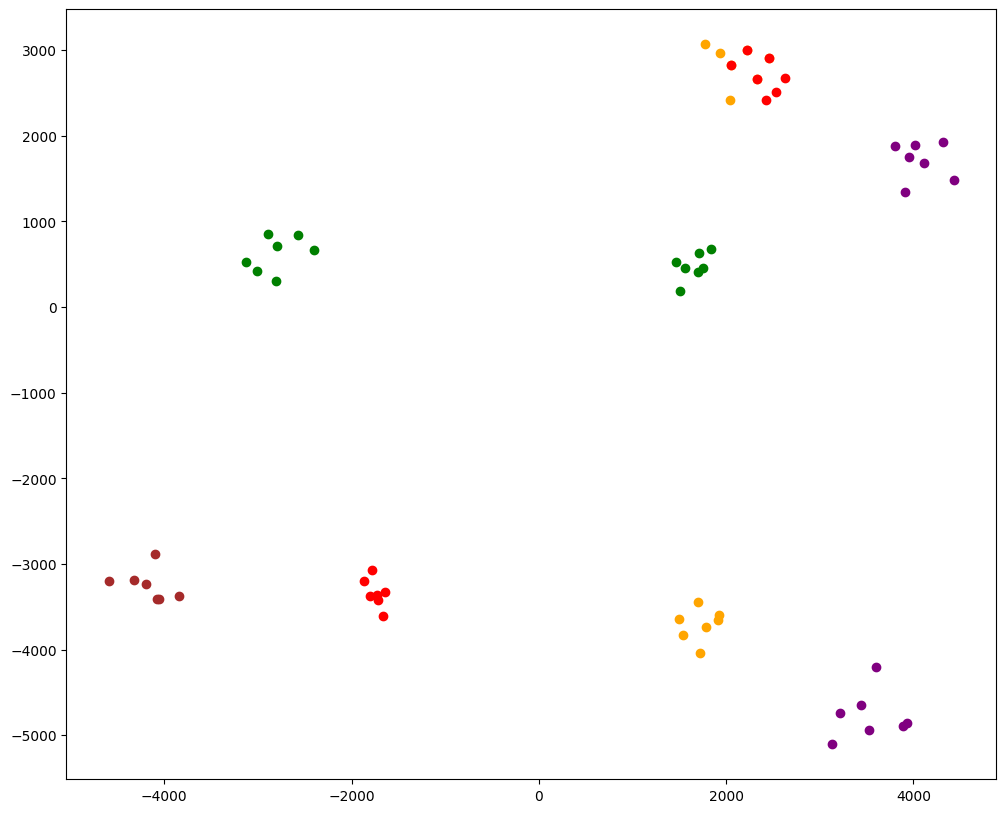

/tmp/ipykernel_4424/518092003.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_basic_df['packet_sent'] = filtered_basic_df['packet_sent'].astype(int)
/tmp/ipykernel_4424/518092003.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_full_df['Sent_Predicted'] = pd.to_numeric(filtered_full_df['Sent_Predicted'], errors='coerce').fillna(0).astype(int)
/tmp/ipykernel_4424/518092003.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

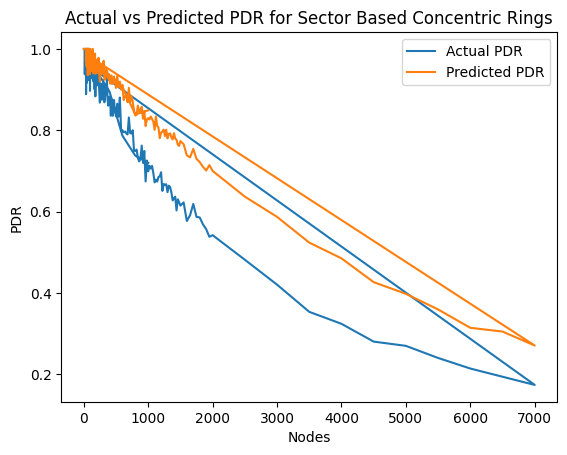

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the two CSV files
basic_df = pd.read_csv("Base_Data_Set_1_with_Prediction_Performance_Latest.csv")
full_df = pd.read_csv("Data_Set_1_with_Prediction_Performance.csv")

# Define the model name
model_name = "Sector Based Concentric Rings"

# Filter rows where 'Radius' column has value 6400
filtered_basic_df = basic_df[basic_df['Radius'] == 6400]
filtered_full_df = full_df[full_df['Radius'] == 6400]

# Convert columns to integer, handling non-finite values
filtered_basic_df['packet_sent'] = filtered_basic_df['packet_sent'].astype(int)
filtered_full_df['Sent_Predicted'] = pd.to_numeric(filtered_full_df['Sent_Predicted'], errors='coerce').fillna(0).astype(int)

# Handle non-finite values in 'Packet_received' column
filtered_basic_df['Packet_received'] = pd.to_numeric(filtered_basic_df['Packet_received'], errors='coerce').fillna(0).astype(int)
filtered_full_df['Received_Predicted'] = pd.to_numeric(filtered_full_df['Received_Predicted'], errors='coerce').fillna(0).astype(int)

# Calculate Actual PDR and Predicted PDR
filtered_basic_df['Actual_PDR'] =  filtered_basic_df['Packet_received'] / filtered_basic_df['packet_sent']
filtered_full_df['Predicted_PDR'] = filtered_full_df['Received_Predicted'] / filtered_full_df['Sent_Predicted']

# Filter rows where 'Nodes' is up to 1500
filtered_basic_df = filtered_basic_df[filtered_basic_df['Nodes'] <= 7000]
filtered_full_df = filtered_full_df[filtered_full_df['Nodes'] <= 7000]

# Plot Actual PDR and Predicted PDR
plt.plot(filtered_basic_df['Nodes'], filtered_basic_df['Actual_PDR'], label='Actual PDR')
plt.plot(filtered_full_df['Nodes'], filtered_full_df['Predicted_PDR'], label='Predicted PDR')
plt.xlabel('Nodes')
plt.ylabel('PDR')
plt.title(f'Actual vs Predicted PDR for {model_name}')
plt.legend()
plt.savefig(f'ActualVs{model_name}_upto_1500.png')
plt.show()


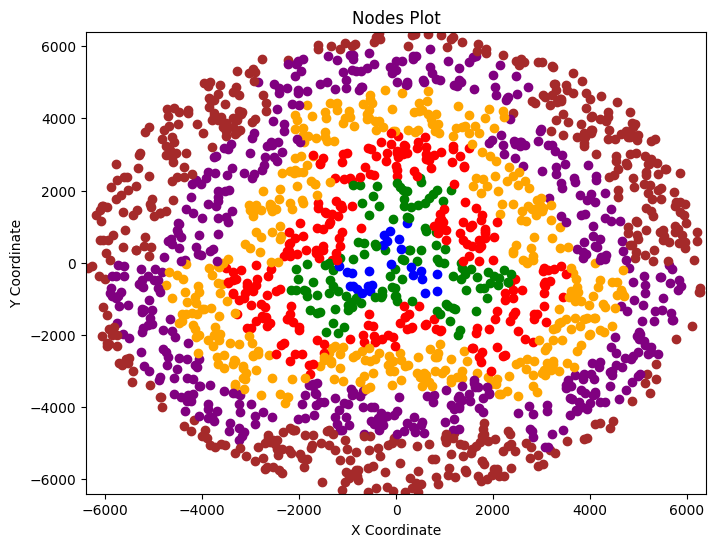

In [39]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# Load data from the CSV file
df = pd.read_csv("Data_Set_1_with_Prediction_Performance.csv")

# Convert 'X Coordinate' and 'Y Coordinate' columns to floats, handling NaN values
df['X Coordinate'] = pd.to_numeric(df['X Coordinate'], errors='coerce')
df['Y Coordinate'] = pd.to_numeric(df['Y Coordinate'], errors='coerce')

# Filter data for 'Nodes' = 1750 and 'Radius' = 6400
df = df[(df['Nodes'] == 1750) & (df['Radius'] == 6400)]

# Create a directory to save plots
plots_dir = "Lorawan_Plots/Concentric_Alternate_Nodes"
os.makedirs(plots_dir, exist_ok=True)

# Define colors for SF values
sf_colors = {'7': 'blue', '8': 'green', '9': 'red', '10': 'orange', '11': 'purple', '12': 'brown'}

# Initialize variables
plt.figure(figsize=(8, 6))
plt.title('Nodes Plot')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.xlim(-6400, 6400)
plt.ylim(-6400, 6400)

# Plot nodes
for index, row in df.iterrows():
    plt.scatter(row['X Coordinate'], row['Y Coordinate'], color=sf_colors[str(row['SF'])], marker='o', label=f'SF {row["SF"]}')


plot_name = f"{plots_dir}/Nodes_Plot.png"
plt.savefig(plot_name)
plt.show()
plt.close()


/tmp/ipykernel_4424/244541259.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_basic_df['packet_sent'] = filtered_basic_df['packet_sent'].astype(int)
/tmp/ipykernel_4424/244541259.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_full_df['Sent_Predicted'] = pd.to_numeric(filtered_full_df['Sent_Predicted'], errors='coerce').fillna(0).astype(int)
/tmp/ipykernel_4424/244541259.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

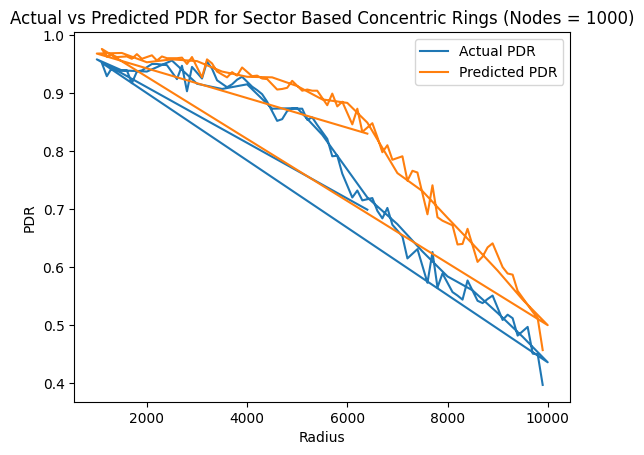

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the two CSV files
basic_df = pd.read_csv("Base_Data_Set_1_with_Prediction_Performance_Latest.csv")
full_df = pd.read_csv("Data_Set_1_with_Prediction_Performance.csv")

# Define the model name
model_name = "Sector Based Concentric Rings"

# Filter rows where 'Nodes' column has value 1000
filtered_basic_df = basic_df[basic_df['Nodes'] == 1000]
filtered_full_df = full_df[full_df['Nodes'] == 1000]

# Convert columns to integer, handling non-finite values
filtered_basic_df['packet_sent'] = filtered_basic_df['packet_sent'].astype(int)
filtered_full_df['Sent_Predicted'] = pd.to_numeric(filtered_full_df['Sent_Predicted'], errors='coerce').fillna(0).astype(int)

# Handle non-finite values in 'Packet_received' column
filtered_basic_df['Packet_received'] = pd.to_numeric(filtered_basic_df['Packet_received'], errors='coerce').fillna(0).astype(int)
filtered_full_df['Received_Predicted'] = pd.to_numeric(filtered_full_df['Received_Predicted'], errors='coerce').fillna(0).astype(int)

# Calculate Actual PDR and Predicted PDR
filtered_basic_df['Actual_PDR'] =  filtered_basic_df['Packet_received'] / filtered_basic_df['packet_sent']
filtered_full_df['Predicted_PDR'] = filtered_full_df['Received_Predicted'] / filtered_full_df['Sent_Predicted']

# Plot Actual PDR and Predicted PDR
plt.plot(filtered_basic_df['Radius'], filtered_basic_df['Actual_PDR'], label='Actual PDR')
plt.plot(filtered_full_df['Radius'], filtered_full_df['Predicted_PDR'], label='Predicted PDR')
plt.xlabel('Radius')
plt.ylabel('PDR')
plt.title(f'Actual vs Predicted PDR for {model_name} (Nodes = 1000)')
plt.legend()
plt.savefig(f'ActualVs{model_name}_Nodes_1000.png')
plt.show()
